In [1]:
from tabula import read_pdf
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [2]:
def get_emissions_table_from_page_1353():
    """Page 1353 from the PDF document, is 1335 IN the document!"""
    df = read_pdf("/home/martin/Downloads/ipcc_wg3_ar5_full.pdf", pages=1353)[0]
    return df

In [3]:
df = get_emissions_table_from_page_1353()

In [4]:
df

,Options,Direct emissions,Infrastructure & supply\rchain emissions,Biogenic CO2 emissions\rand albedo effect,Methane emissions,Lifecycle emissions\r(incl. albedo effect)
0,NaN,Min / Median / Max,Typical values,Min / Median / Max,NaN,NaN
1,Currently Commercially Available Technologies,NaN,NaN,NaN,NaN,NaN
2,Coal — PC,670 / 760 / 870,9.6,0,47,740 / 820 / 910
3,Gas — Combined Cycle,350 / 370 / 490,1.6,0,91,410 / 490 / 650
4,Biomass — cofiring,n. a. ii,–,–,–,620 / 740 / 890iii
5,Biomass — dedicated,n. a. ii,210,27,0,130 / 230 / 420iv
6,Geothermal,0,45,0,0,6.0 / 38 / 79
7,Hydropower,0,19,0,88,1.0 / 24 / 2200
8,Nuclear,0,18,0,0,3.7 / 12 / 110
9,Concentrated Solar Power,0,29,0,0,8.8 / 27 / 63


In [5]:
def get_lifecycle_emissions_df(df):
    split_df = df["Lifecycle emissions\r(incl. albedo effect)"].str.split('/', expand=True)
    split_df.columns = ["Min", "Median", "Max"]
    split_df["Max"] = split_df["Max"].str.extract('(\d+)')
    split_df = split_df.apply(pd.to_numeric, errors="coerce")
    return pd.concat([df["Options"], split_df], axis=1).dropna(how="all")
    

In [6]:
split_df = get_lifecycle_emissions_df(df)

In [7]:
split_df

,Options,Min,Median,Max
1,Currently Commercially Available Technologies,NaN,NaN,NaN
2,Coal — PC,740.0,820.0,910.0
3,Gas — Combined Cycle,410.0,490.0,650.0
4,Biomass — cofiring,620.0,740.0,890.0
5,Biomass — dedicated,130.0,230.0,420.0
6,Geothermal,6.0,38.0,79.0
7,Hydropower,1.0,24.0,2200.0
8,Nuclear,3.7,12.0,110.0
9,Concentrated Solar Power,8.8,27.0,63.0
10,Solar PV — rooftop,26.0,41.0,60.0


In [11]:
availabl_technology_df = split_df.loc[2:13]

In [12]:
availabl_technology_df

,Options,Min,Median,Max
2,Coal — PC,740.0,820.0,910.0
3,Gas — Combined Cycle,410.0,490.0,650.0
4,Biomass — cofiring,620.0,740.0,890.0
5,Biomass — dedicated,130.0,230.0,420.0
6,Geothermal,6.0,38.0,79.0
7,Hydropower,1.0,24.0,2200.0
8,Nuclear,3.7,12.0,110.0
9,Concentrated Solar Power,8.8,27.0,63.0
10,Solar PV — rooftop,26.0,41.0,60.0
11,Solar PV — utility,18.0,48.0,180.0


In [13]:
amount_options = len(availabl_technology_df["Options"])
ticks_every = 5
max_y = amount_options * ticks_every
y_steps_list = list(range(ticks_every, max_y + 1, ticks_every))


Options    Coal — PC
Min            740.0
Median         820.0
Max            910.0
Name: 2, dtype: object

In [23]:
for i, value in enumerate(y_steps_list):
    create_bar(availabl_technology_df.iloc[i]["Min"], availabl_technology_df.iloc[i]["Max"], value)

5
10
15
20
25
30
35
40
45
50
55
60


In [14]:
def create_bar(min_value, max_value, y_step_value):
    return ax.broken_barh([(min_value, (max_value - min_value))], (y_step_value - 1.5, 3))
    

In [39]:
def plot_co2_emissions(df, labels_column, ticks_every = 5):
    amount_options = len(df[labels_column])
    max_y = amount_options * ticks_every
    y_steps_list = list(range(ticks_every, max_y + 1, ticks_every))

    fig, ax = plt.subplots()
    for i, value in enumerate(y_steps_list):
        min_value = df.iloc[i]["Min"]
        max_value = df.iloc[i]["Max"]
        ax.broken_barh([(min_value, (max_value - min_value))], (value - 1, 2))
        #create_bar(df.iloc[i]["Min"], df.iloc[i]["Max"], value)
    #ax.broken_barh([(740, (910-740))], (3.5, 3))
    ax.set_ylim(0, max_y + ticks_every)
    ax.set_yticks(y_steps_list, labels=availabl_technology_df["Options"])
    ax.set_xlim(0, 1000)
    ax.set_xlabel('CO2 Emissions')

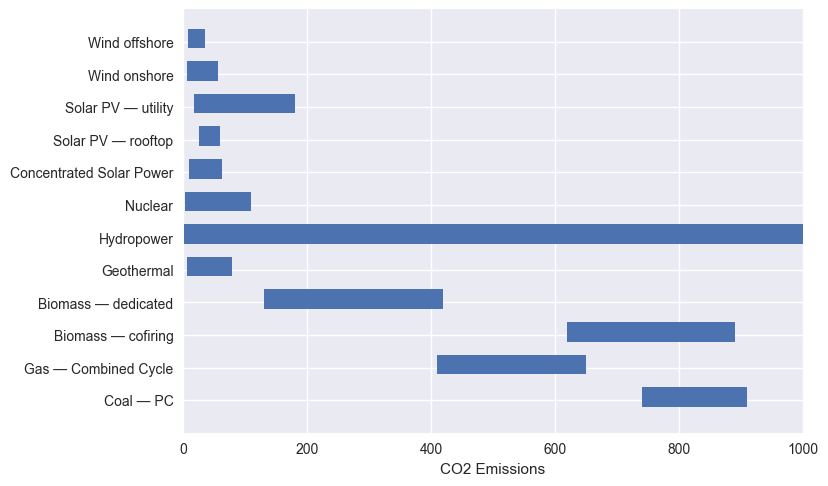

In [38]:
plot_co2_emissions(availabl_technology_df, "Options")

/tmp/ipykernel_8879/194743020.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 0, 'CO2 Emissions')

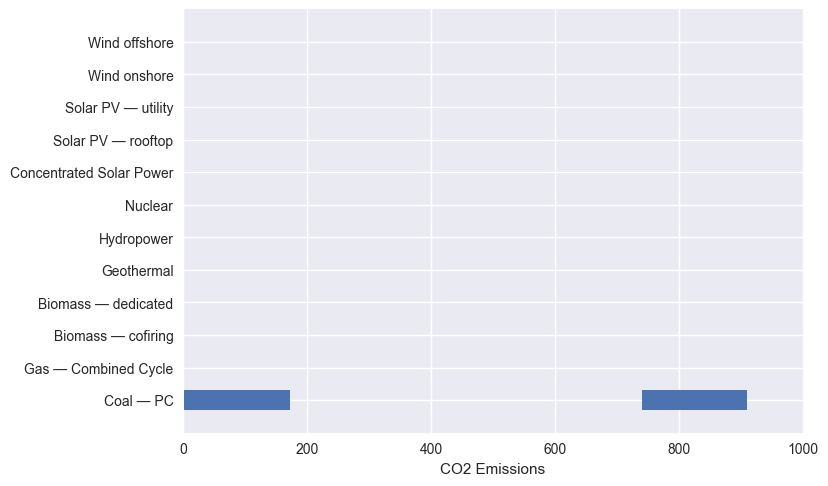

In [27]:
plt.style.use("seaborn")
fig, ax = plt.subplots()
ax.broken_barh([(740, (910-740))], (3.5, 3))
ax.set_ylim(0, max_y + ticks_every)
ax.set_yticks(y_steps_list, labels=availabl_technology_df["Options"])
ax.set_xlim(0, 1000)
ax.set_xlabel('CO2 Emissions')